<a href="https://colab.research.google.com/github/albvieiraa/Data-Analysis-Bootcamp-WoMakersCode/blob/main/estatistica_frequencia_medidas_individual_maryllian_vieira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística Frequências e Medidas - Desafio Individual

Bootcamp Data Analytics 2024.2

Autora: Maryllian Vieira

Squad: Hedy Lamar

Você é uma pesquisadora de um cursinho para estudantes que querem ingressar na universidade em 2025. Seu objetivo é retirar informações da base de dados do enem doanoanteriorparaalinhar melhor as estratégias do cursinho para cada estudante. O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No dado existe a representação de 1000 pessoas, sendo cada uma delas uma linha

# Setpup Inicial

In [ ]:
### bibliotecas base
import pandas as pd
import numpy as np
### bibliotecas para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt
### bibliotecas para estatística
import scipy.stats as stat

In [ ]:
#criando dataframe
df_enem = pd.read_json('/content/enem_2023.json')
df_enem.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


# Análises iniciais

In [ ]:
#verificando medidas e frequências iniciais
df_enem.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [ ]:
#verificando tipo de variáveis e se há colunas com valores nulos
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [ ]:
#contagem de valores nulos
enem_nulos = df_enem.isnull().sum()
enem_nulos

,0
Linguagens,103
Ciências humanas,64
Ciências da natureza,176
Matemática,76
Redação,140
Sexo,0


# Questão 1

1. Qual das disciplinas tem a maior amplitude de nota?

In [ ]:
#criando função para calcular amplitude
def amplitude(df_enem):
  return df_enem.max() - df_enem.min()

In [ ]:
#aplicando a função nas variáveis numéricas com método .apply
amplitudes_enem = df_enem.select_dtypes(include='number').apply(amplitude)
amplitudes_enem_arrend = round(amplitudes_enem, 2)

amplitudes_enem_arrend.sort_values(ascending=False)

,0
Redação,729.16
Linguagens,517.46
Matemática,488.08
Ciências da natureza,487.60
Ciências humanas,474.02


A disciplina com maior amplitude é a **Redação** com nota **729.16**

# Questão 2

2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [ ]:
#removendo valores nulos
df_enem_limpos = df_enem.dropna()
df_enem_limpos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 998
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            548 non-null    float64
 1   Ciências humanas      548 non-null    float64
 2   Ciências da natureza  548 non-null    float64
 3   Matemática            548 non-null    float64
 4   Redação               548 non-null    float64
 5   Sexo                  548 non-null    object 
dtypes: float64(5), object(1)
memory usage: 30.0+ KB


Com a remoção dos dados nulos, restaram 548 registros.

In [ ]:
#calculando média e mediana das variáveis numéricas
media_mediana_enem = df_enem_limpos.select_dtypes(include='number').agg(['mean', 'median'])
media_mediana_enem = round(media_mediana_enem, 2)

print(f"Média e Mediana por Disciplina: \n{media_mediana_enem}")

Média e Mediana por Disciplina: 
        Linguagens  Ciências humanas  Ciências da natureza  Matemática  \
mean        517.47            528.35                502.14      537.17   
median      517.13            528.50                502.94      532.96   

        Redação  
mean     641.19  
median   639.60  


# Questão 3

3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:

- Redação- 2
- Matemática e suas Tecnologias- 4
- Linguagens, Códigos e suas Tecnologias- 2
- Ciências Humanas e suas Tecnologias- 1
- Ciências da Natureza e suas Tecnologias- 1

Qual o **desvio padrão e média** das notas dos 500 estudantes mais bem colocados considerando esses pesos?

In [ ]:
#criando uma cópia do df_enem_limpos
df_enem_notas_ponderadas = df_enem_limpos.copy()

In [ ]:
#verificando nome das colunas
df_enem_notas_ponderadas.columns

Index(['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática',
       'Redação', 'Sexo'],
      dtype='object')

In [ ]:
#criando nova coluna que recebe a soma das notas ponderadas
df_enem_notas_ponderadas['Nota Ponderada'] = (df_enem_notas_ponderadas['Redação'] * 2 + df_enem_notas_ponderadas['Matemática'] * 4 + df_enem_notas_ponderadas['Linguagens'] * 2 + df_enem_notas_ponderadas['Ciências humanas'] * 1 + df_enem_notas_ponderadas['Ciências da natureza'] * 1) / 10
df_enem_notas_ponderadas.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Nota Ponderada
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem,515.020199
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem,623.192417
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem,576.526064
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem,543.765146
5,616.043360,502.007005,497.777935,615.902547,507.365147,Homem,571.021214


In [ ]:
#identificando os 500 alunos com as notas ponderadas mais altas
melhores_500_alunos = df_enem_notas_ponderadas.nlargest(500, 'Nota Ponderada')
melhores_500_alunos.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Nota Ponderada
25,604.825455,447.532353,523.041011,727.181224,870.464077,Mulher,682.987732
824,533.812379,611.760520,494.994598,807.877902,697.570213,Não idenficado,680.103191
702,551.398112,637.818208,451.624683,803.769938,652.669636,Homem,671.265814
129,583.015454,434.261543,588.516699,687.621711,852.273821,Mulher,664.384364
60,498.394660,668.355060,457.371963,760.136151,711.458481,Mulher,658.597791


In [ ]:
#calculando desvio padrão e média desses alunos
#desvio padrão
std_ponderadas = melhores_500_alunos['Nota Ponderada'].std()
print(f"O desvio padrão das notas ponderadas dos 500 melhores alunos é: {std_ponderadas:.2f}")

#média
media_ponderadas = melhores_500_alunos['Nota Ponderada'].mean()
print(f"A média das notas ponderadas dos 500 melhores alunos é: {media_ponderadas:.2f}")

O desvio padrão das notas ponderadas dos 500 melhores alunos é: 40.44
A média das notas ponderadas dos 500 melhores alunos é: 557.29


# Questão 4

4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [ ]:
melhores_500_alunos.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Nota Ponderada
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,522.839398,529.920191,503.086728,547.407965,652.289598,557.289677
std,80.774298,77.131378,78.613174,83.240776,109.963819,40.435866
min,287.000000,289.900000,314.400000,319.800000,324.222553,489.969900
25%,469.208687,475.315310,449.998135,493.253850,577.166482,524.100986
50%,520.814400,530.718013,504.567014,543.072034,649.023147,553.727144
75%,575.248094,586.525378,549.611418,600.049286,723.311028,586.392115
max,804.456317,763.919695,802.004568,807.877902,931.305275,682.987732


In [ ]:
#selecionando os 40 melhores dentro dos 500 alunos
vagas = 40
classificados = melhores_500_alunos.nlargest(vagas, 'Nota Ponderada')

In [ ]:
#calculando a variância e média dos alunos que entraram
variancia_classificados = classificados['Nota Ponderada'].var()
print(f"A variância das notas ponderadas dos 40 alunos é de {variancia_classificados:.2f}.")

media_classificados = classificados['Nota Ponderada'].mean()
print(f"A média dos alunos classificados é de {media_classificados:.2f}.")

A variância das notas ponderadas dos 40 alunos é de 295.77.
A média dos alunos classificados é de 636.68.


# Questão 5

5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [ ]:
df_enem_limpos.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,548.000000,548.000000,548.000000,548.000000,548.000000
mean,517.467162,528.351454,502.142101,537.172480,641.193123
std,82.113520,76.786787,78.419720,87.850751,115.578585
min,287.000000,289.900000,314.400000,319.800000,290.308608
25%,462.647968,475.858622,449.998135,477.018471,558.524958
50%,517.128831,528.503263,502.935209,532.961486,639.602691
75%,572.645407,584.115231,552.260535,591.335247,715.550093
max,804.456317,763.919695,802.004568,807.877902,931.305275


In [ ]:
#calculando o terceiro quartil (q75)
quartil_75_ling = np.percentile(df_enem_limpos['Linguagens'], 75)
quartil_75_mat = np.percentile(df_enem_limpos['Matemática'], 75)

In [ ]:
#exibindo
print(f"O valor do teto do terceiro quartil para as disciplinas de Matemática e Linguagens é de {quartil_75_mat:.2f} e {quartil_75_ling:.2f} respectivamente.")

O valor do teto do terceiro quartil para as disciplinas de Matemática e Linguagens é de 591.34 e 572.65 respectivamente.


# Questão 6

6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?

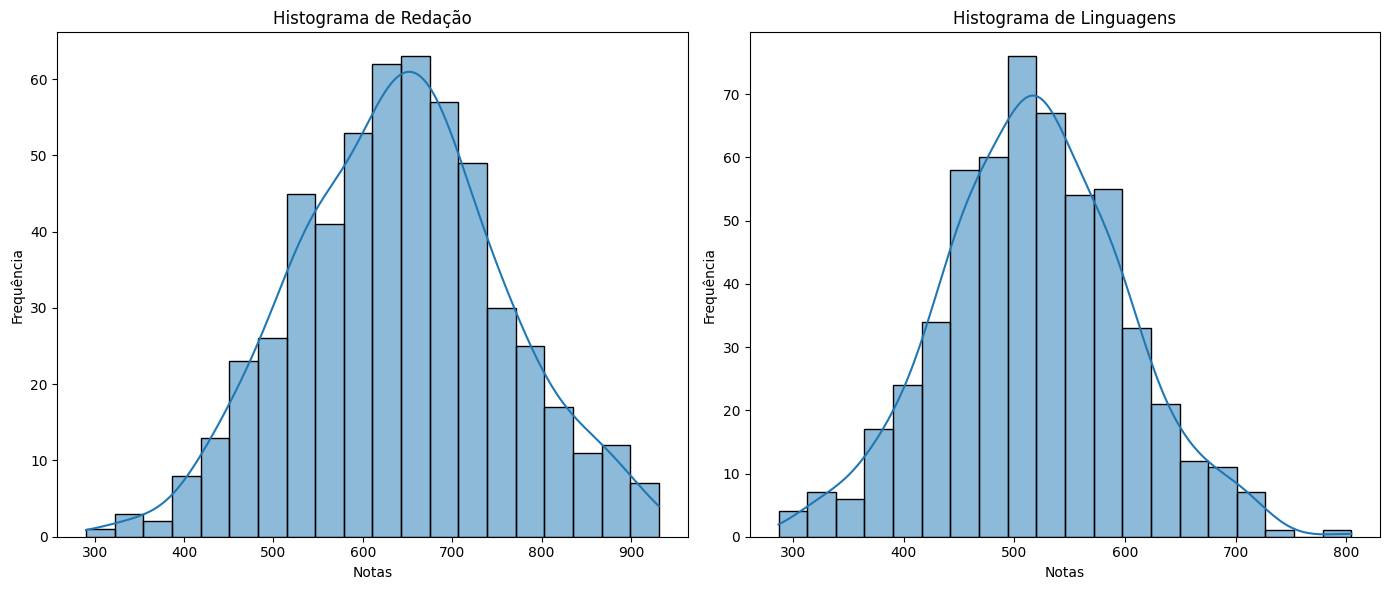

In [ ]:
#função para exibir os dois histogramas
plt.figure(figsize=(14, 6))

#Histograma Redação
plt.subplot(1, 2, 1)
sns.histplot(df_enem_limpos['Redação'], bins = 20, kde = True, edgecolor='black')
plt.title('Histograma de Redação')
plt.xlabel('Notas')
plt.ylabel('Frequência')

#Histograma Linguagens
plt.subplot(1, 2, 2)
sns.histplot(df_enem_limpos['Linguagens'], bins = 20, kde = True, edgecolor='black')
plt.title('Histograma de Linguagens')
plt.xlabel('Notas')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

De acordo com as figuras, ambos os histogramas são **simétricos** pois contém no meio do gráfico a maior concentração de dados.

# Questão 7

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

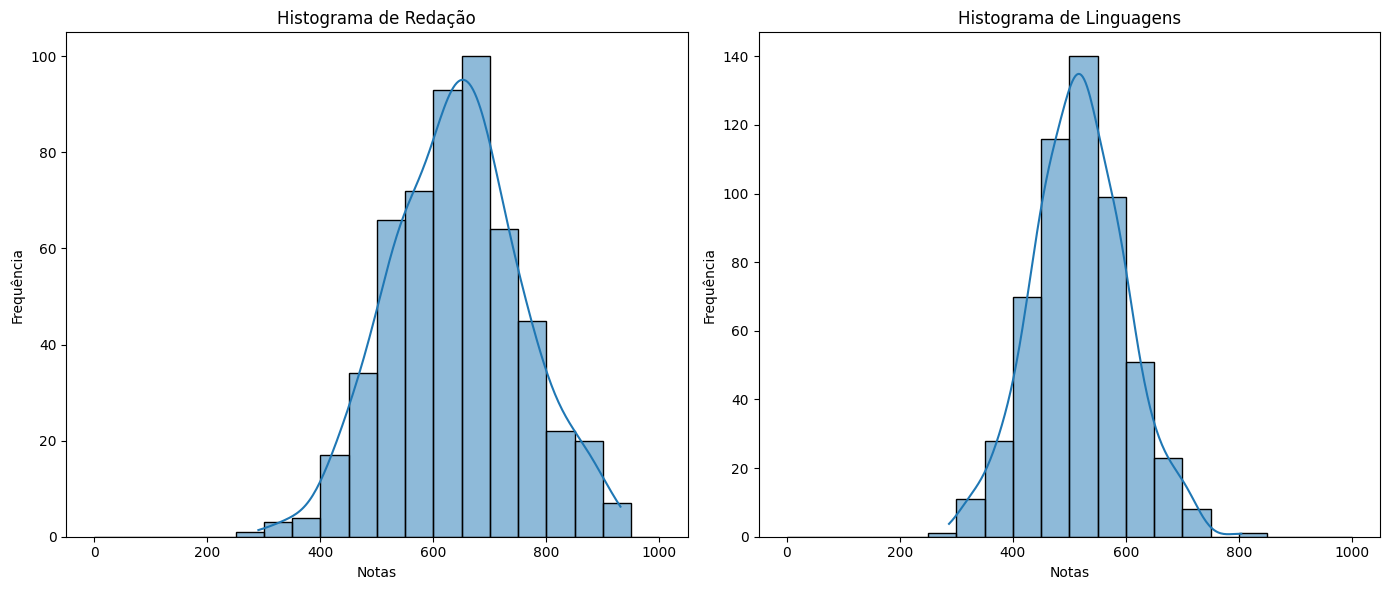

In [ ]:
#função para exibir os dois histogramas
plt.figure(figsize=(14, 6))

#Histograma Redação
plt.subplot(1, 2, 1)
sns.histplot(df_enem_limpos['Redação'], bins = 20, binrange=(0,1000), kde = True, edgecolor='black')
plt.title('Histograma de Redação')
plt.xlabel('Notas')
plt.ylabel('Frequência')

#Histograma Linguagens
plt.subplot(1, 2, 2)
sns.histplot(df_enem_limpos['Linguagens'], bins = 20, binrange=(0,1000), kde = True, edgecolor='black')
plt.title('Histograma de Linguagens')
plt.xlabel('Notas')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

Ambos os histogramas permanecem **simétricos**, independentemente do intervalo

# Questão 8

8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.

In [ ]:
#criando cópia do df com os dados limpos
df_boxplot = df_enem_limpos.copy()

#selecionando apenas as disciplinas 'Ciências da natureza' e 'Redação'
df_boxplot = df_boxplot[['Ciências da natureza', 'Redação']]

In [ ]:
# Calculando os quartis
quartis = df_boxplot.quantile([0.25, 0.5, 0.75])

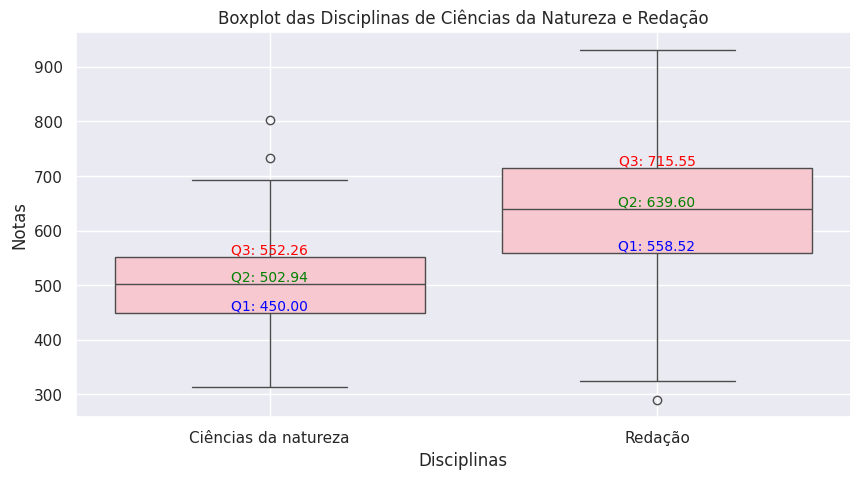

In [ ]:
# Criando o boxplot
sns.set_theme()
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_boxplot, color = 'pink', showfliers=True)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Disciplinas')
plt.ylabel('Notas')
plt.title('Boxplot das Disciplinas de Ciências da Natureza e Redação')

# Adicionando valores às linhas dos quartis
for I in range(len(quartis.columns)):
    plt.text(I, quartis.iloc[0, I], f'Q1: {quartis.iloc[0, I]:.2f}', ha='center', va='bottom', fontsize=10, color='blue')
    plt.text(I, quartis.iloc[1, I], f'Q2: {quartis.iloc[1, I]:.2f}', ha='center', va='bottom', fontsize=10, color='green')
    plt.text(I, quartis.iloc[2, I], f'Q3: {quartis.iloc[2, I]:.2f}', ha='center', va='bottom', fontsize=10, color='red')

# Exibindo o boxplot
plt.grid(True)
plt.show()


In [ ]:
# Método IQR
def find_outlier_iqr(dataset, colname):
  q25 = np.quantile(dataset[colname], 0.25)
  q75 = np.quantile(dataset[colname], 0.75)

  # Calcula  IQR
  iqr = q75 - q25

  # Calcula outlier cutoff
  cut_off = iqr * 1.5

  # Calcula margens inferiores (lower) e superiores (upper)
  lower = q25 - cut_off
  upper = q75 + cut_off

  outliers = []

  for I in dataset[colname].values:
    if((I > upper) or (I < lower)):
      outliers.append(I)

  print(f"Disciplina: {colname}.")
  print(f"Número de outliers encontrado: {len(outliers)}.")
  print(f"IQR: {iqr:.2f}. \nValor mínimo: {lower:.2f}. \nValor máximo: {upper:.2f}.\n")

# Saida
for column in df_boxplot:
    find_outlier_iqr(df_boxplot, column)


Disciplina: Ciências da natureza.
Número de outliers encontrado: 2.
IQR: 102.26. 
Valor mínimo: 296.60. 
Valor máximo: 705.65.

Disciplina: Redação.
Número de outliers encontrado: 1.
IQR: 157.03. 
Valor mínimo: 322.99. 
Valor máximo: 951.09.



# Questão 9

9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)

In [ ]:
#função para encontrar os outliers e substituir por NaN
def replace_na_outlier_zscore(dataset, threshold, colname):
    df = dataset[colname]
    outliers = []
    zscore = []
    val = []
    threshold = threshold
    mean = np.mean(df)
    std = np.std(df)
    for i in df.values:
      z_score= (i - mean)/std
      zscore.append(z_score)
      if np.abs(z_score) > threshold:
          outliers.append(i)
          val.append(np.nan)
      else:
          val.append(i)

    return val

In [ ]:
# removendo os NaN (valores nulos) que representam agora os outliers

def drop_outliers(dataset, threshold):
  for column in dataset.select_dtypes(include=np.number).columns:
    dataset[column] =  replace_na_outlier_zscore(dataset, 3, column)
  return dataset.dropna()

In [ ]:
#função para validar se existe alteração significativa
def validar_diferenca(diferenca_percentual):
  if diferenca_percentual < 5:
    return "Não. A remoção dos outliers não resultou em alterações significativas na média nacional"
  else:
    return "Sim. A remoção dos outliers resultou em alterações significativas na média nacional"

In [ ]:
# Criando um DataFrame sem outliers
df_original = df_enem_limpos.copy()
df_sem_outliers = drop_outliers(df_original, 3)

In [ ]:
# Calculando a média nacional
media_nacional_original = df_enem_limpos.mean(numeric_only=True).mean()
media_nacional_sem_outliers = df_sem_outliers.mean(numeric_only=True).mean()

In [ ]:
# Calculando diferença percentual
diferenca_percentual = ((media_nacional_sem_outliers - media_nacional_original) / media_nacional_original) * 100

# Resposta
print(f"Média nacional antes de remover outliers: {media_nacional_original:.2f}.")
print(f"Média nacional após remover outliers: {media_nacional_sem_outliers:.2f}.")
print(f"Diferença percentual entre as médias: {diferenca_percentual:.2f}.")
print(f"Podemos concluir que: {validar_diferenca(diferenca_percentual)}.")

Média nacional antes de remover outliers: 545.27.
Média nacional após remover outliers: 544.66.
Diferença percentual entre as médias: -0.11.
Podemos concluir que: Não. A remoção dos outliers não resultou em alterações significativas na média nacional.


# Questão 10

10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão

In [ ]:
#criando um novo df
df_substituicao = pd.DataFrame(df_enem)

In [ ]:
df_substituicao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [ ]:
df_substituicao.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [ ]:
#verificando valores nulos
df_substituicao.isnull().sum()

,0
Linguagens,103
Ciências humanas,64
Ciências da natureza,176
Matemática,76
Redação,140
Sexo,0


## Realizando substituições

In [ ]:
#dropar a coluna 'Sexo' (não numérica)
df_numericas = df_substituicao.drop(columns=['Sexo'])

In [ ]:
#substituindo valores nulos pela média, moda e mediana

media_substituida = df_numericas.fillna(df_numericas.mean())
moda_substituida = df_numericas.fillna(df_numericas.mode().iloc[0])
mediana_substituida = df_numericas.fillna(df_numericas.median())

In [ ]:
#calcular média geral e desvio padrão para cada substituição
media_geral_media = media_substituida.stack().mean()
desvio_padrao_media = media_substituida.stack().std()

media_geral_moda = moda_substituida.stack().mean()
desvio_padrao_moda = moda_substituida.stack().std()

media_geral_mediana = mediana_substituida.stack().mean()
desvio_padrao_mediana = mediana_substituida.stack().std()

In [ ]:
#comparando os resultados
print("Substituindo com média:")
print(f"Média geral: {media_geral_media:.2f}")
print(f"Desvio padrão: {desvio_padrao_media:.2f}")

print("\nSubstituindo com moda:")
print(f"Média geral: {media_geral_moda:.2f}")
print(f"Desvio padrão: {desvio_padrao_moda:.2f}")

print("\nSubstituindo com mediana:")
print(f"Média geral: {media_geral_mediana:.2f}")
print(f"Desvio padrão: {desvio_padrao_mediana:.2f}")

Substituindo com média:
Média geral: 542.93
Desvio padrão: 97.43

Substituindo com moda:
Média geral: 515.13
Desvio padrão: 123.36

Substituindo com mediana:
Média geral: 542.83
Desvio padrão: 97.35


### Exibindo as comparações

In [ ]:
#criando df para agrupar os resultados
resultados = pd.DataFrame({
    'Métricas' : ['Média', 'Desvio Padrão'],
    'Média': [media_geral_media, desvio_padrao_media],
    'Moda': [media_geral_moda, desvio_padrao_moda],
    'Mediana': [media_geral_mediana, desvio_padrao_mediana]
})

In [ ]:
#transpondo o DataFrame para facilitar a criação do gráfico
resultados = resultados.set_index('Métricas').T

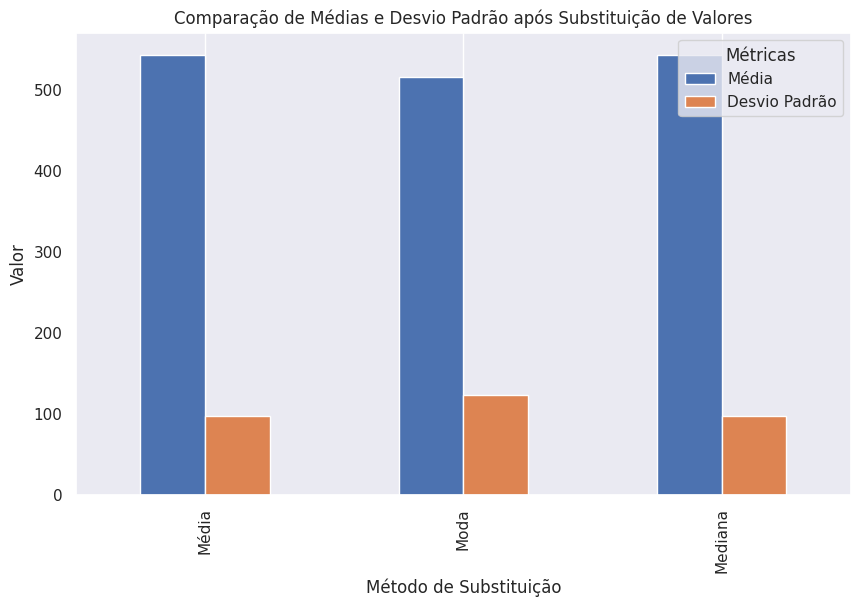

In [ ]:
#criando o gráfico de barras
resultados.plot(kind='bar', figsize=(10, 6))
plt.title('Comparação de Médias e Desvio Padrão após Substituição de Valores')
plt.xlabel('Método de Substituição')
plt.ylabel('Valor')
plt.legend(title='Métricas')
plt.grid(axis='y')
plt.show()

A partir das substuições e análise do gráfico, é possivel inferir que:

1. A substituição pela média e mediana demonstrou pouca alteração na média. Contudo, observando o desvio padrão foi menor quando os valores nulos foram substituidos pela mediana.

2. Ao substituir os valores nulos pela moda, a média das notas foi a menor, mas o desvio padrão é bem maior quando comparado às outras substituições.

3. A escolha da substuição dependerá do contexto e objetivo da análise.
* Visto que a **média** pode superestimar os valores se houver muitos valores altos no conjunto de dados original.
* A **moda** também pode apresentar valores superestimados, se os valores forem muito altos e a distribuição dos dados não for unimodal.
* Já a **mediana** é menos sensívela  valores extremos.



Logo, a partir dessas inferências e observando o caso, escolheria substituir os valores nulos pela **mediana**.